In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


In [2]:
import os
os.listdir('data')


['.dropbox',
 '.ipynb_checkpoints',
 '311-service-requests.csv',
 'bikes.csv',
 'Chicago_Crimes_2001_to_2004.csv',
 'Chicago_Crimes_2012_to_2017.csv',
 'chicago_crime_2014.csv',
 'cwurData.csv',
 'educational_attainment_supplementary_data.csv',
 'education_expenditure_supplementary_data.csv',
 'media_mnp.ipynb',
 'pandas_extras.ipynb',
 'pandas_intro.ipynb',
 'plotter.ipynb',
 'Pokemon.csv',
 'school_and_country_table.csv',
 'shanghaiData.csv',
 'StudentsPerformance.csv',
 'timesData.csv',
 'weather_2012.csv']

In [3]:
df=pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [5]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [6]:
df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [7]:
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [8]:
df.max()

Unnamed: 0                                               6253474
ID                                                      10827880
Date                                      12/31/2016 12:56:00 AM
Block                                      175XX W WINSTON COURT
IUCR                                                        5132
Primary Type                                   WEAPONS VIOLATION
Description       VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS
Arrest                                                      True
Domestic                                                    True
Beat                                                        2535
District                                                      31
Ward                                                          50
Community Area                                                77
FBI Code                                                      26
X Coordinate                                         1.20512e+06
Y Coordinate             

In [9]:
df.min()

Unnamed: 0                             3
ID                                 20224
Date              01/01/2012 01:00:00 AM
Block                 0000X  I94/EXIT 12
IUCR                                0110
Primary Type                       ARSON
Description               $500 AND UNDER
Arrest                             False
Domestic                           False
Beat                                 111
District                               1
Ward                                   1
Community Area                         0
FBI Code                             01A
X Coordinate                           0
Y Coordinate                           0
Year                                2012
Updated On        01/01/2016 03:52:56 PM
Latitude                         36.6194
Longitude                       -91.6866
dtype: object

In [13]:
df['Date']=pd.to_datetime(df.Date)

In [14]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [16]:
df.index=pd.DatetimeIndex(df.Date)

In [18]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [19]:
#adding time hour for easy grouping
df['time_hour']=df['Date'].apply(lambda x : x.hour)

In [20]:
df['month']=df['Date'].apply(lambda x : x.month)
df['year']=df['Date'].apply(lambda x: x.year)

In [21]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


In [22]:
df=df[df['year'] !=2017] # remove 2017 data as it is containn only one month

In [23]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


 ## yearly crime trend analysis

In [2]:
plt.figure(figsize=(11,5))
#resampling time series by month
df.resample('M').size().plot(legend=False)
plt.title('Numbers of crime per month(2012-2017)')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.show()

NameError: name 'df' is not defined

# indivisual crime trends

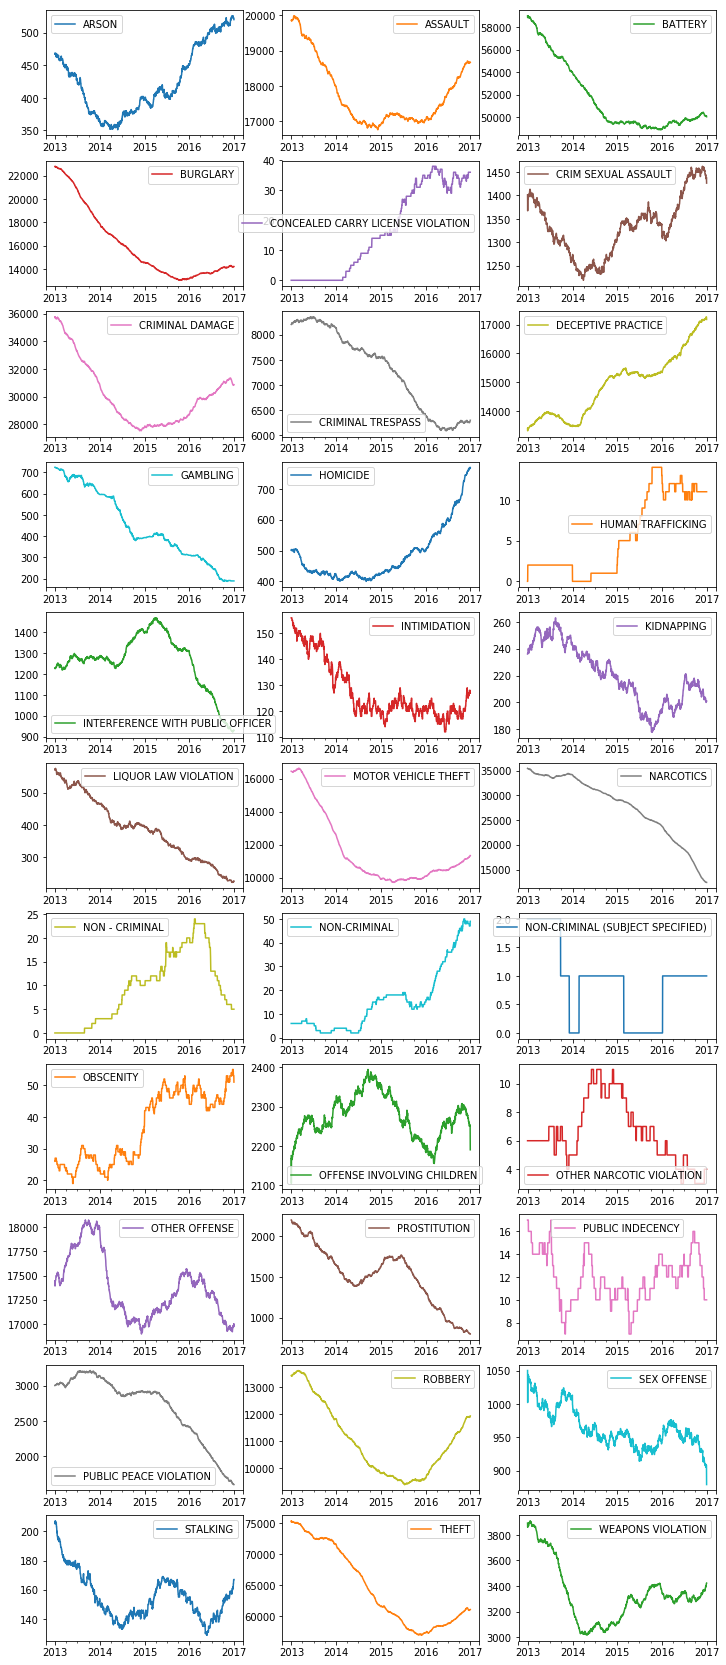

In [31]:
crime_count_date=df.pivot_table('ID',aggfunc=np.size,columns='Primary Type',index=df.index.date,fill_value=0)
crime_count_date.index=pd.DatetimeIndex(crime_count_date.index)
plot=crime_count_date.rolling(365).sum().plot(figsize=(12,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)

## konthly and hourly rime trend analysis

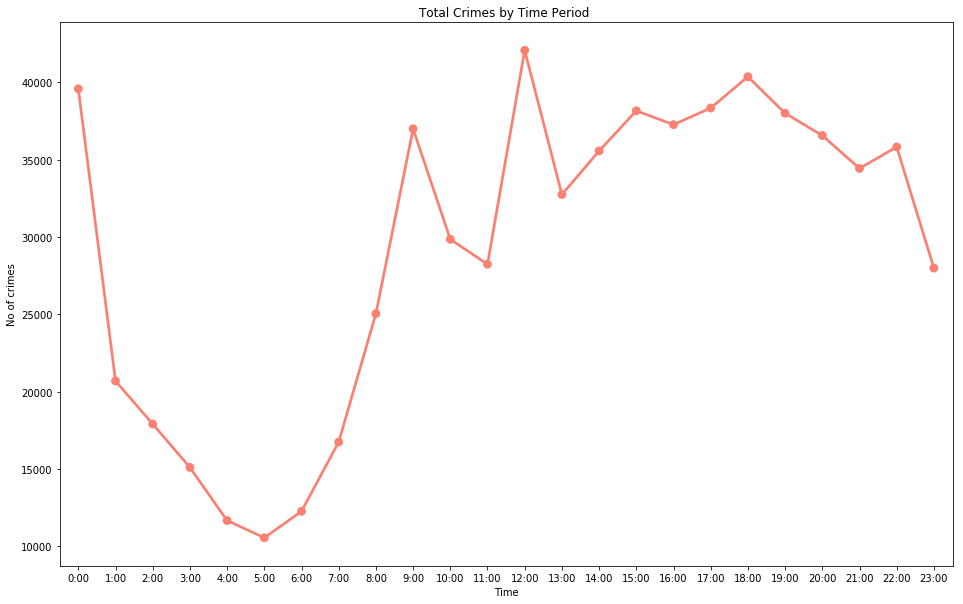

In [41]:
#just to see overall crime trend by hourly periods ,we can seee which timing have the highest amount of crime 
crimes_by_time=df.copy()
#define our important top 10 crime types 
primary_types=["ARSON",'CONCEALED CARRY LICENSE VIOLATION','CRIM SEXUAL ASSAULT',
              'DECEPTIVE PRACTICE','HOMICIDE','ROBBERY',
              'THEFT','WEAPONS VIOLATION','MOTOR VEHICLE THEFT','CRIMINAL DAMAGE']
#FILTER OUT ROWS WITH ONLY TOP 10 CRIMES MENTINONED ABOVE
crimes_by_time=crimes_by_time[crimes_by_time['Primary Type'].isin(primary_types)]
#group crimes by time hour
crimes_by_time=crimes_by_time.groupby('time_hour').size().reset_index(name='No.of crimes')
crimes_by_time['hours']=crimes_by_time['time_hour'].apply(lambda x: str(x)+':00')

#plot crimes by time period
fig=plt.figure(figsize=(16,10))
sns.pointplot(data=crimes_by_time,x='hours',y='No.of crimes',color='salmon')

#set label and title
plt.xlabel('Time')
plt.ylabel('No of crimes')
plt.title('Total Crimes by Time Period ')
plt.show()



                                         **hourly crime frequency**

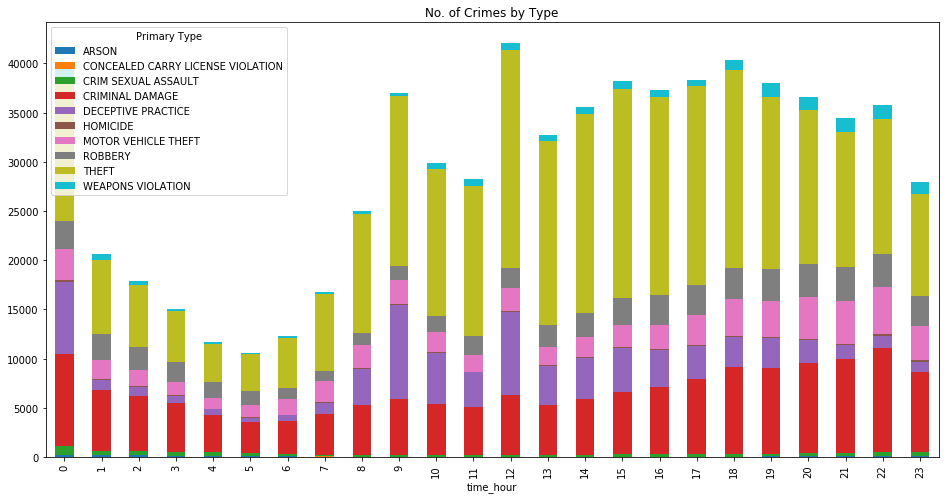

In [46]:
#group crimes by type
crimes_by_type=df.copy()
crimes_by_type=crimes_by_type[crimes_by_type['Primary Type'].isin(primary_types)]
crimes_by_type=crimes_by_type.groupby(['time_hour','Primary Type']).size().reset_index(name='No. of crimes')
# format hour data
crimes_by_type['hours']=crimes_by_type['time_hour'].apply(lambda x: str(x)+':00')

#create crimem type pivot tabel
crimes_by_type_pivot=pd.pivot_table(crimes_by_type, index=['time_hour'],columns=['Primary Type'],
                                   values='No. of crimes', aggfunc=np.sum)
# create stacked bar chart of crime types,compared hourly 
crimes_by_type_pivot.plot(kind="bar",stacked=True, figsize=(16,8),
                         title="No. of Crimes by Type")


                                   ## Hourly Crime Frequency by Crime Types

                                 MONTHLY CRIME FREQUENCY
    

# RATIO OF CRIME ARREST BASED ON CRIME TYPES

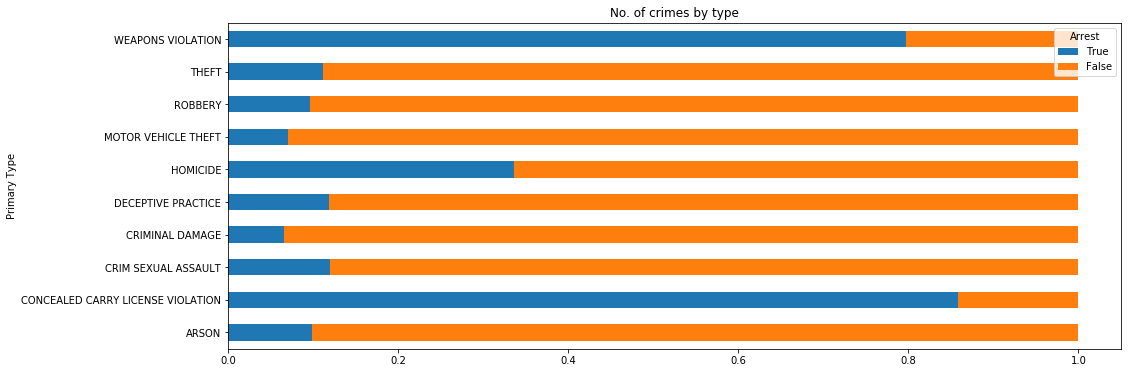

In [71]:
#GROUP BYBCRIME PRIMARY TYPE AND ARREST
crimes_by_arrest=df.copy()
crimes_by_arrest=crimes_by_arrest.groupby(['Primary Type','Arrest']).size().reset_index(name='No. of crimes')

#filter for top 10 crimes primary type mentioned earlier 
crimes_by_arrest=crimes_by_arrest[crimes_by_arrest['Primary Type'].isin(primary_types)]

# create pivot tabel
crimes_by_arrest_pivot=pd.pivot_table(crimes_by_arrest, index=['Primary Type'],columns=['Arrest'],values='No. of crimes',
                                      aggfunc=np.sum)
crimes_by_arrest_pivot=crimes_by_arrest_pivot.reset_index()
# create new column in pivot table 'total no.',[true] and [false]
crimes_by_arrest_pivot['Total No']=crimes_by_arrest_pivot[True]+crimes_by_arrest_pivot[False]
crimes_by_arrest_pivot['True']=crimes_by_arrest_pivot[True]/crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot['False']=crimes_by_arrest_pivot[False]/crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot=crimes_by_arrest_pivot[['Primary Type','True','False']]
crimes_by_arrest_pivot = crimes_by_arrest_pivot.set_index('Primary Type')


#plot stacked bar chart of arrest sccess for 10 diffrent crimes
crimes_by_arrest_pivot.plot(kind='barh', stacked=True,figsize=(16,6),title='No. of crimes by type')


                             CRIME ARREST RATIO

##  MAJOR CRIMES MONTHLY ARREST ANALYSIS

In [74]:
#CONCATENATE ["PRIMARY TYPE "] AND ["DESCRIPTION "] TOGETHER TO MAKE A NEW COLUMN
df["Details"]=df['Primary Type']+","+df['Description']

#group by crime details and show top 10 crimes with highest arrest rate
top_crimes=df.groupby(['Details'])['Arrest'].count()
top_crimes=pd.DataFrame(top_crimes).nlargest(10,'Arrest').reset_index()
top_crimes=list(top_crimes['Details'])
top_crimes

['THEFT,$500 AND UNDER',
 'BATTERY,DOMESTIC BATTERY SIMPLE',
 'BATTERY,SIMPLE',
 'THEFT,OVER $500',
 'CRIMINAL DAMAGE,TO VEHICLE',
 'CRIMINAL DAMAGE,TO PROPERTY',
 'ASSAULT,SIMPLE',
 'NARCOTICS,POSS: CANNABIS 30GMS OR LESS',
 'BURGLARY,FORCIBLE ENTRY',
 'MOTOR VEHICLE THEFT,AUTOMOBILE']

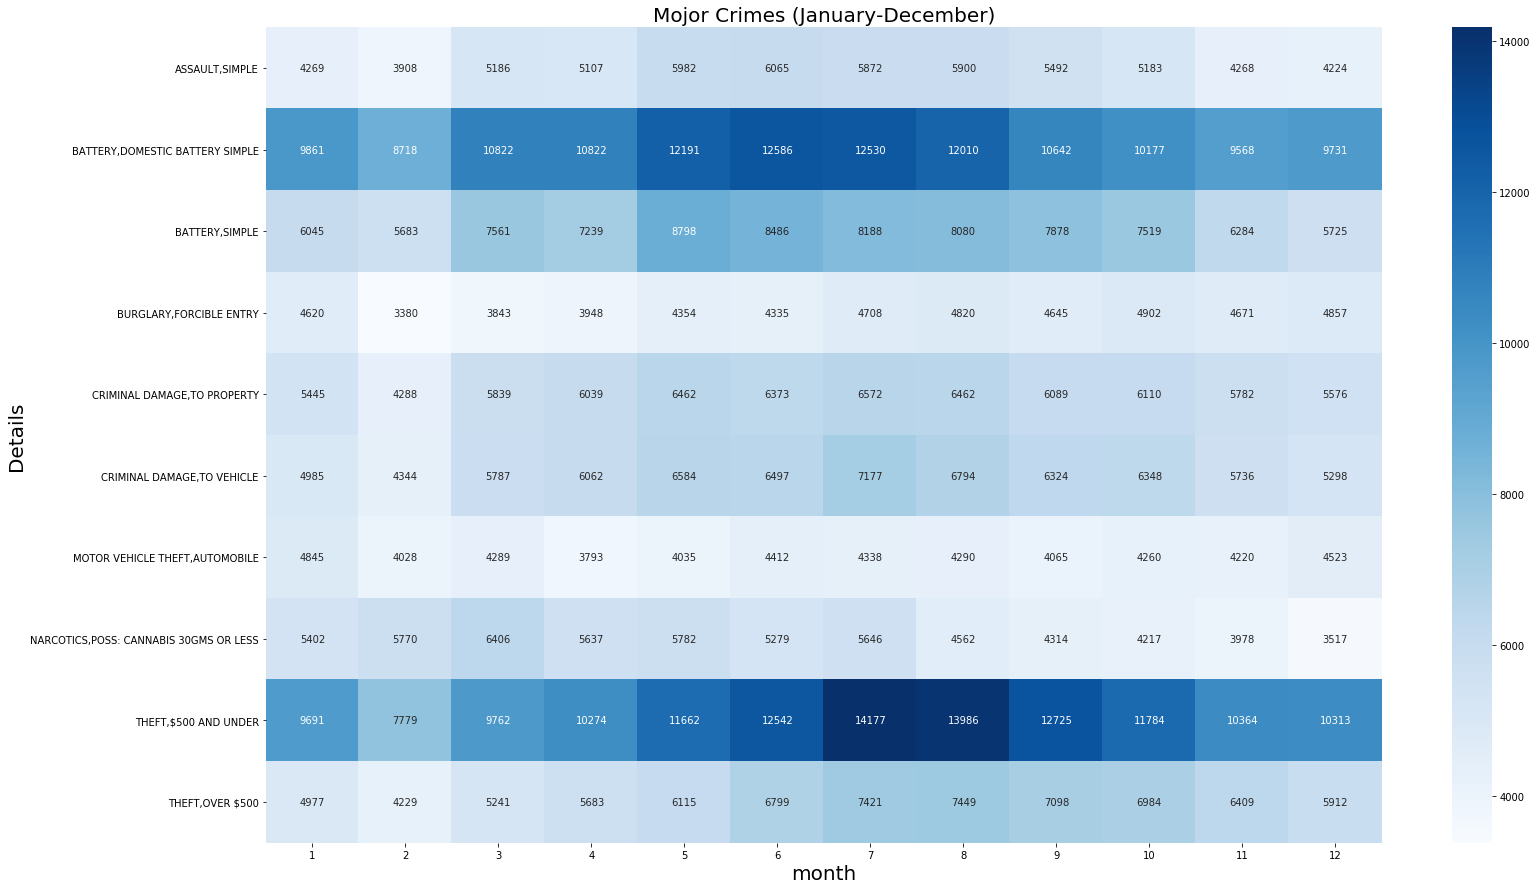

In [77]:
df2=df.groupby(['Details','month'])['Arrest'].count()
#chart formating
DIMS=(25,15)
fig=plt.figure(figsize=DIMS)
ax1=fig.add_subplot(111)
ax1.set_title('Mojor Crimes (January-December)',fontsize=20)
ax1.set_xlabel('month',fontsize=20)
ax1.set_ylabel('Details',fontsize=20)

#get top 20 data
df2=pd.DataFrame(df2).reset_index()
df2=df2[df2['Details'].isin(top_crimes)]

#pivot data to 2D table
df2=df2.pivot_table(index='Details',columns='month',values="Arrest")
df2.fillna(0,inplace=True)

#crime heatmap
sns.heatmap(df2,cmap="Blues",annot=True,fmt='g')